<h1>Linear Regression Basics</h1>


In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Instructions for updating:
non-resource variables are not supported in the long term


In [24]:
# Define the independant variable
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

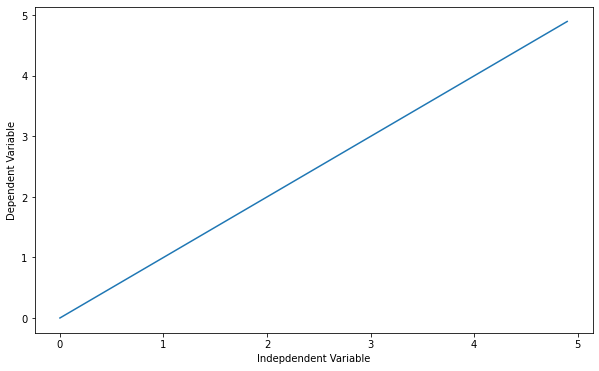

In [25]:
# Adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


Simple linear relations were used to try to describe and quantify many observable physical phenomena, the easiest to understand are speed and distance traveled:

$$Distance Traveled = Speed \times Time + Initial Distance$$

$$Mass =  Volume \times Density$$

When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset. We do this by adjusting the "slope" and "intercept" parameters to the data in the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.


<h1>Linear Regression with TensorFlow</h1>

A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.

For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. 



In [26]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-11-06 17:16:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   228KB/s    in 0.3s    

2020-11-06 17:16:24 (228 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



<h2>Structure of the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [27]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Here we want to use linear regression to predict Co2 Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [28]:
train_x = np.asanyarray(df[['ENGINESIZE']])    # independant variable
train_y = np.asanyarray(df[['CO2EMISSIONS']])   # dependant variable

First, we initialize the variables <b>a</b> and <b>b</b>, with some random guess, and then we define the linear function as,

In [29]:
a = tf.Variable(15.65)
b = tf.Variable(35.8)
y = a * train_x + b

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use <b>tf.reduce_mean()</b>. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [30]:
loss = tf.reduce_mean(tf.square(y - train_y))

Then, we define the optimizer method. The gradient Descent optimizer takes in parameter: learning rate, which corresponds to the speed with which the optimizer should learn;

In [32]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

Now we will define the training method of our graph, what method we will use for minimize the loss? We will use the <b>.minimize()</b> which will minimize the error function of our optimizer, resulting in a better model.

In [33]:
train = optimizer.minimize(loss)

In [34]:
# Initialize the variables before executing a graph:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [35]:
# Now we are ready to start the optimization and run the graph:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 30293.936 76.58939 52.60591
5 1757.059 57.350918 53.373753
10 1645.7007 56.272255 58.400764
15 1552.2092 55.08307 63.032276
20 1471.2158 53.978252 67.34365
25 1401.0491 52.94991 71.356514
30 1340.2618 51.99276 75.09156
35 1287.6005 51.10188 78.568
40 1241.9789 50.27268 81.803764
45 1202.4554 49.500885 84.8155
50 1168.2157 48.78253 87.618706
55 1138.5526 48.11391 90.22784
60 1112.8552 47.49158 92.65633
65 1090.5925 46.912334 94.91669
70 1071.3062 46.373196 97.020546
75 1054.5977 45.871384 98.978745
80 1040.1228 45.404312 100.80138
85 1027.5829 44.96958 102.49781
90 1016.71906 44.564945 104.076805
95 1007.30743 44.188328 105.54647


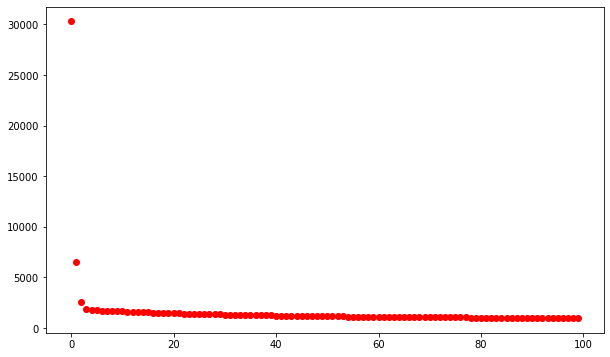

In [36]:
# Plot the loss values to see how it has changed during the training:
plt.plot(loss_values, 'ro')

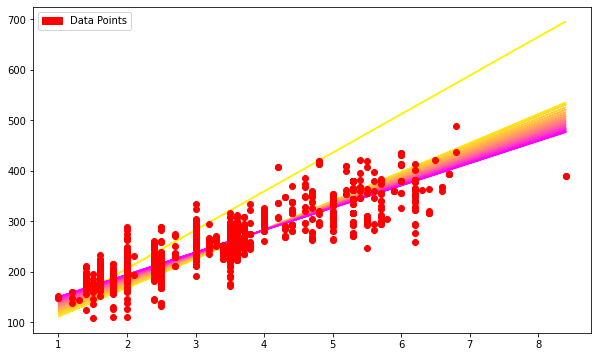

In [37]:
# Visualize how the coefficient and intercept of line has changed to fit the data
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()